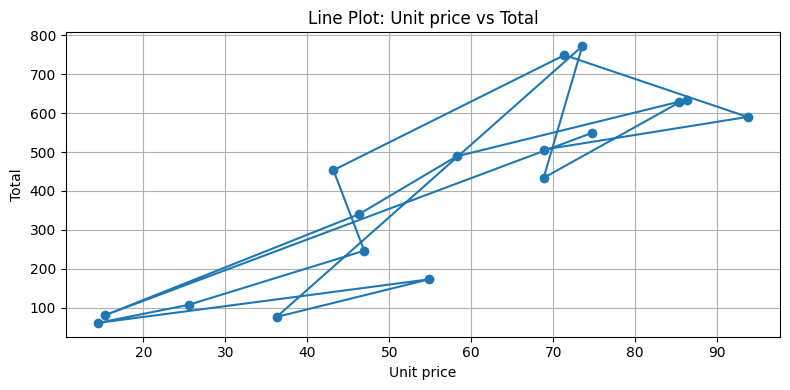

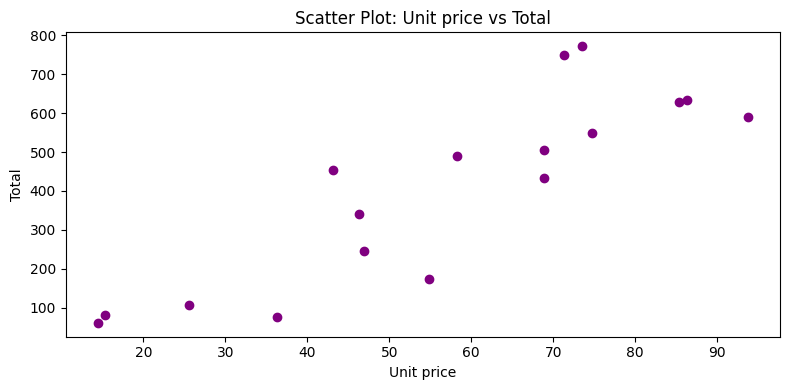

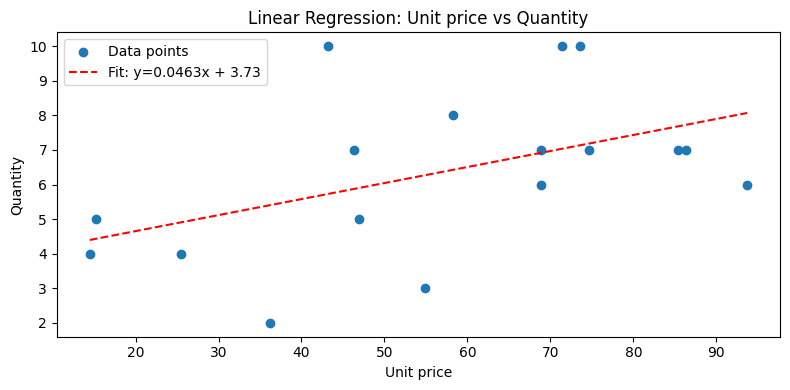

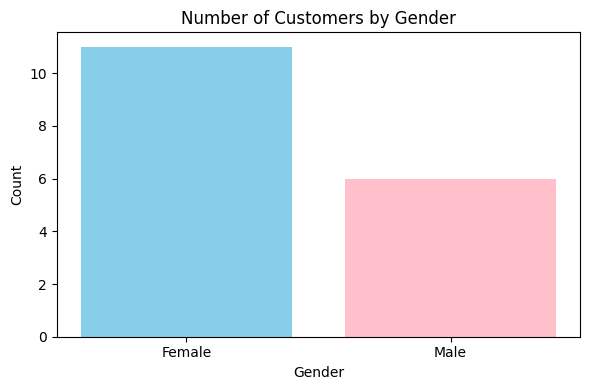

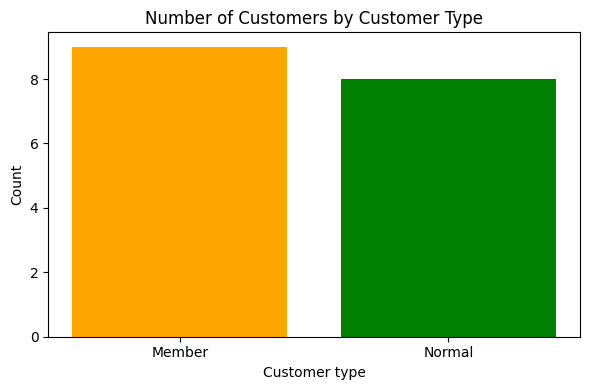

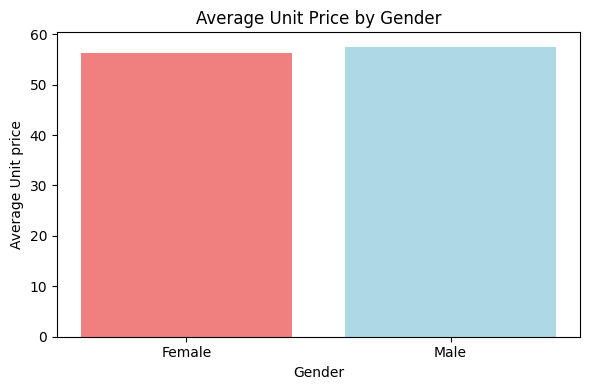

C:\Users\shiva\AppData\Local\Temp\ipykernel_17472\1751704209.py:98: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_city, labels=cities, vert=True)


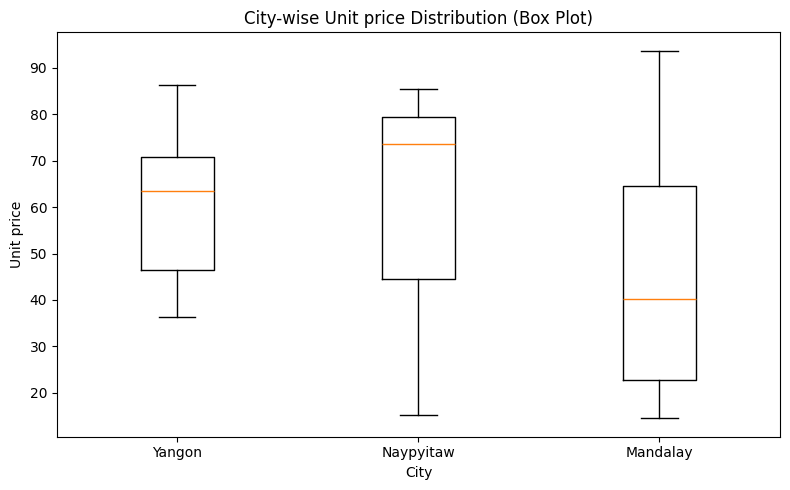

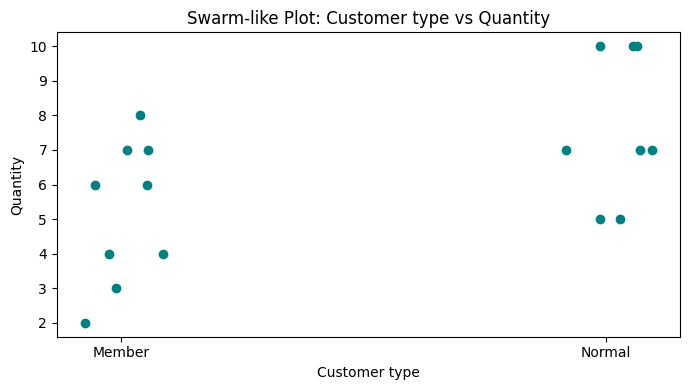

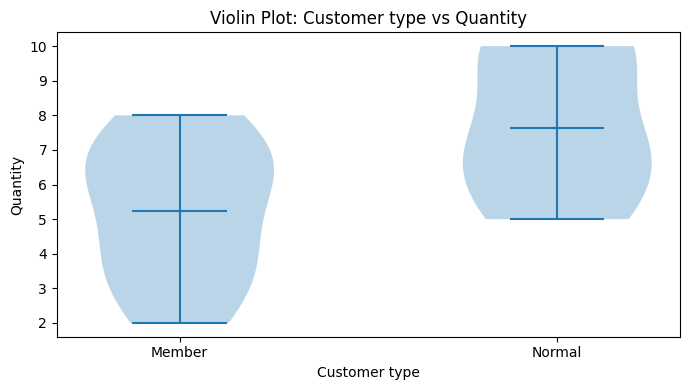

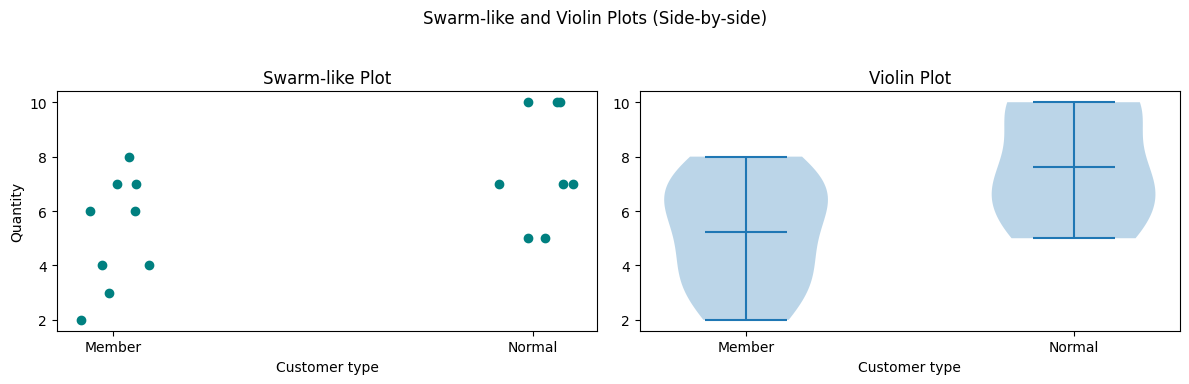

In [1]:
# 📊 Supermarket Sales Data Visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = {
    "Branch": ["A","C","A","A","A","C","A","C","A","B","B","B","A","A","A","B","A"],
    "City": ["Yangon","Naypyitaw","Yangon","Yangon","Yangon","Naypyitaw","Yangon","Naypyitaw",
             "Yangon","Mandalay","Mandalay","Mandalay","Yangon","Yangon","Yangon","Mandalay","Yangon"],
    "Customer type": ["Member","Normal","Normal","Member","Normal","Normal","Member","Normal",
                      "Member","Member","Member","Member","Normal","Normal","Normal","Member","Member"],
    "Gender": ["Female","Female","Male","Male","Male","Male","Female","Female",
               "Female","Female","Female","Male","Female","Male","Female","Female","Female"],
    "Unit price": [74.69,15.28,46.33,58.22,86.31,85.39,68.84,73.56,
                   36.26,54.84,14.48,25.51,46.95,43.19,71.38,93.72,68.93],
    "Quantity": [7,5,7,8,7,7,6,10,2,3,4,4,5,10,10,6,7],
    "Tax 5%": [26.1415,3.82,16.2155,23.288,30.2085,29.8865,20.652,36.78,
               3.626,8.226,2.896,5.102,11.7375,21.595,35.69,28.116,24.1255],
    "Total": [548.9715,80.22,340.5255,489.048,634.3785,627.6165,433.692,772.38,
              76.146,172.746,60.816,107.142,246.4875,453.495,749.49,590.436,506.6355]
}

df = pd.DataFrame(data)


plt.figure(figsize=(8,4))
plt.plot(df["Unit price"], df["Total"], marker='o')
plt.title("Line Plot: Unit price vs Total")
plt.xlabel("Unit price")
plt.ylabel("Total")
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(8,4))
plt.scatter(df["Unit price"], df["Total"], color='purple')
plt.title("Scatter Plot: Unit price vs Total")
plt.xlabel("Unit price")
plt.ylabel("Total")
plt.tight_layout()
plt.show()


x = df["Unit price"].values
y = df["Quantity"].values
coeffs = np.polyfit(x, y, deg=1)
poly = np.poly1d(coeffs)
x_line = np.linspace(x.min(), x.max(), 200)
y_line = poly(x_line)

plt.figure(figsize=(8,4))
plt.scatter(x, y, label="Data points")
plt.plot(x_line, y_line, linestyle='--', color='red', label=f"Fit: y={coeffs[0]:.4f}x + {coeffs[1]:.2f}")
plt.title("Linear Regression: Unit price vs Quantity")
plt.xlabel("Unit price")
plt.ylabel("Quantity")
plt.legend()
plt.tight_layout()
plt.show()


gender_counts = df["Gender"].value_counts()
plt.figure(figsize=(6,4))
plt.bar(gender_counts.index, gender_counts.values, color=['skyblue', 'pink'])
plt.title("Number of Customers by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


cust_counts = df["Customer type"].value_counts()
plt.figure(figsize=(6,4))
plt.bar(cust_counts.index, cust_counts.values, color=['orange', 'green'])
plt.title("Number of Customers by Customer Type")
plt.xlabel("Customer type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


avg_price_gender = df.groupby("Gender")["Unit price"].mean()
plt.figure(figsize=(6,4))
plt.bar(avg_price_gender.index, avg_price_gender.values, color=['lightcoral', 'lightblue'])
plt.title("Average Unit Price by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Unit price")
plt.tight_layout()
plt.show()


cities = df["City"].unique()
data_by_city = [df.loc[df["City"] == c, "Unit price"].values for c in cities]
plt.figure(figsize=(8,5))
plt.boxplot(data_by_city, labels=cities, vert=True)
plt.title("City-wise Unit price Distribution (Box Plot)")
plt.xlabel("City")
plt.ylabel("Unit price")
plt.tight_layout()
plt.show()


types = df["Customer type"].unique()
type_to_x = {t: i+1 for i,t in enumerate(types)}
x_vals = np.array([type_to_x[t] for t in df["Customer type"]])

# Add random jitter for swarm effect
rng = np.random.default_rng(seed=42)
jitter = (rng.random(size=len(x_vals)) - 0.5) * 0.2

plt.figure(figsize=(7,4))
plt.scatter(x_vals + jitter, df["Quantity"], color='teal')
plt.xticks(list(type_to_x.values()), list(type_to_x.keys()))
plt.title("Swarm-like Plot: Customer type vs Quantity")
plt.xlabel("Customer type")
plt.ylabel("Quantity")
plt.tight_layout()
plt.show()


groups = [df.loc[df["Customer type"] == t, "Quantity"].values for t in types]
positions = np.arange(1, len(types)+1)

plt.figure(figsize=(7,4))
plt.violinplot(groups, positions=positions, showmeans=True)
plt.xticks(positions, types)
plt.title("Violin Plot: Customer type vs Quantity")
plt.xlabel("Customer type")
plt.ylabel("Quantity")
plt.tight_layout()
plt.show()


fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].scatter(x_vals + jitter, df["Quantity"], color='teal')
axes[0].set_xticks(list(type_to_x.values()))
axes[0].set_xticklabels(list(type_to_x.keys()))
axes[0].set_title("Swarm-like Plot")
axes[0].set_xlabel("Customer type")
axes[0].set_ylabel("Quantity")

# Violin
axes[1].violinplot(groups, positions=positions, showmeans=True)
axes[1].set_xticks(positions)
axes[1].set_xticklabels(types)
axes[1].set_title("Violin Plot")
axes[1].set_xlabel("Customer type")

plt.suptitle("Swarm-like and Violin Plots (Side-by-side)")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
